### CREDIT RISK MACHINE LEARNING

En este proyecto de Machine Learning usaremos el dataset de Credit Risk. En este problema queremos saber si concederles un credito conlleva un riesgo de no devolución y, por lo tanto, si se lo daremos o no. Usaremos un clasificacdor binario para este problema. Veamos un poco la descripción del dataset.

Aquí un poco de información para este dataset:


1. **person_age:** Edad de la persona solicitante del crédito (entero).
2. **person_income:** Ingreso anual de la persona solicitante (entero, en alguna unidad monetaria no especificada).
3. **person_home_ownership:** Tipo de propiedad de vivienda del solicitante (categoría: RENT, OWN, MORTGAGE, etc.).
4. **person_emp_length:** Años de experiencia laboral de la persona (float, algunos valores faltantes).
5. **loan_intent:** Propósito del préstamo (categoría: PERSONAL, EDUCATION, MEDICAL, etc.).
6. **loan_grade:** Grado del préstamo (categoría: A, B, C, etc.).
7. **loan_amnt:** Monto solicitado del préstamo (entero).
8. **loan_int_rate:** Tasa de interés del préstamo (float, algunos valores faltantes).
9. **loan_status:** Indicador del estatus del préstamo (1 = aprobado, 0 = rechazado).
10. **loan_percent_income:** Proporción del préstamo respecto al ingreso anual del solicitante (float).
11. **cb_person_default_on_file:** Indicador de historial de incumplimiento (categoría: Y = Sí, N = No).
12. **cb_person_cred_hist_length:** Duración del historial crediticio de la persona en años (entero).

Con esta información podemos sacar en claro cual será el **target**: **loan_status.**

### 1. Importamos los paquetes

Vamos a importar todo lo que necesitemos. 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import bootcampviztools as bt 

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNetCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRegressor, XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc, log_loss, cohen_kappa_score, classification_report

### 2. Carga y primer vistazo de los datos.

In [2]:
df_credit = pd.read_csv("./data/credit_risk_dataset.csv")

df_credit.info()
df_credit.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


### 3. FeatureEngineering

In [3]:
#Vemos que hay casi 3000 entradas con nulos. Así que vamos a eliminar esas entradas. Tenemos de sobra para hacer el proyecto. 

df_credit.dropna(inplace=True)

In [4]:
df_credit.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28638 entries, 0 to 28637
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       28638 non-null  int64  
 1   person_age                  28638 non-null  int64  
 2   person_income               28638 non-null  int64  
 3   person_home_ownership       28638 non-null  object 
 4   person_emp_length           28638 non-null  float64
 5   loan_intent                 28638 non-null  object 
 6   loan_grade                  28638 non-null  object 
 7   loan_amnt                   28638 non-null  int64  
 8   loan_int_rate               28638 non-null  float64
 9   loan_status                 28638 non-null  int64  
 10  loan_percent_income         28638 non-null  float64
 11  cb_person_default_on_file   28638 non-null  object 
 12  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(6), object

In [5]:
df_credit.loan_intent.value_counts()

loan_intent
EDUCATION            5704
MEDICAL              5293
VENTURE              5001
PERSONAL             4877
DEBTCONSOLIDATION    4565
HOMEIMPROVEMENT      3198
Name: count, dtype: int64

In [6]:
df_credit.person_home_ownership.value_counts()

person_home_ownership
RENT        14551
MORTGAGE    11801
OWN          2192
OTHER          94
Name: count, dtype: int64

In [7]:
df_credit.person_age.value_counts(sort=True)

person_age
23     3413
22     3163
24     3130
25     2700
26     2201
27     1887
28     1624
29     1493
30     1126
21     1061
31     1008
32      860
33      758
34      625
35      559
36      482
37      409
38      321
39      270
40      236
41      218
42      165
43      142
44      116
45       91
46       86
47       76
48       65
50       45
49       41
52       33
51       33
53       26
54       21
55       18
58       17
57       15
56       14
20       14
60       13
61        8
66        8
64        7
62        6
69        5
70        5
59        5
65        5
144       3
63        3
73        2
78        1
123       1
80        1
84        1
76        1
67        1
Name: count, dtype: int64

In [8]:
#Eliminar los valores anomalos en edad
df_credit = df_credit[df_credit["person_age"] <= 90]

#Eliminar los valores anomalos en antigüedad empresarial
df_credit = df_credit[df_credit["person_emp_length"] <= 90]


df_credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [9]:
df_credit.reset_index(inplace= True)
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28632 entries, 0 to 28631
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       28632 non-null  int64  
 1   person_age                  28632 non-null  int64  
 2   person_income               28632 non-null  int64  
 3   person_home_ownership       28632 non-null  object 
 4   person_emp_length           28632 non-null  float64
 5   loan_intent                 28632 non-null  object 
 6   loan_grade                  28632 non-null  object 
 7   loan_amnt                   28632 non-null  int64  
 8   loan_int_rate               28632 non-null  float64
 9   loan_status                 28632 non-null  int64  
 10  loan_percent_income         28632 non-null  float64
 11  cb_person_default_on_file   28632 non-null  object 
 12  cb_person_cred_hist_length  28632 non-null  int64  
dtypes: float64(3), int64(6), object

In [10]:
df_credit["age_group"] = pd.cut(df_credit["person_age"], 
                                bins=[20,26,36,46,56,66],
                                labels = ["20-25", "26-35", "36-45", "46-55", "56-65"])

In [11]:
df_credit.age_group.dtype

CategoricalDtype(categories=['20-25', '26-35', '36-45', '46-55', '56-65'], ordered=True, categories_dtype=object)

In [12]:
df_credit.head(10)

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group
0,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25
1,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25
2,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25
3,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25
4,5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25
5,6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3,20-25
6,7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4,20-25
7,8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2,20-25
8,9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3,20-25
9,10,22,85000,RENT,6.0,VENTURE,B,35000,10.37,1,0.41,N,4,20-25


In [13]:
df_credit.drop("index", inplace= True, axis = 1)

### 4. Distribución del target

El target de este proyecto es loan_status, ya que indica si pagaron exitosamente el prestamo (0) o no (1), de modo que será nuestro target de riesgo.

In [14]:
target = "loan_status"

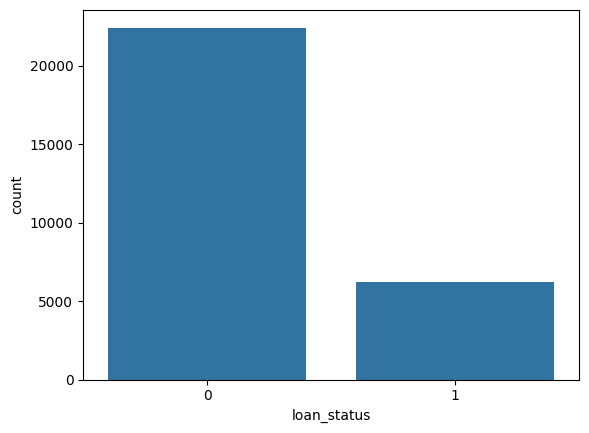

In [15]:
sns.countplot(df_credit, x= target);

Vale, tenemos un target desbalanceado con una diferencia de casi 15000. Así que habrá que realizarle algún ajuste. 

### 5. Train y Test Split

In [16]:
train_set, test_set = train_test_split(df_credit, test_size= 0.2, random_state= 42)

In [17]:
print(train_set)

       person_age  person_income person_home_ownership  person_emp_length  \
5001           23          35000                  RENT                7.0   
17933          29          52000                  RENT               11.0   
12799          25         110000                   OWN                6.0   
4724           26          51000                  RENT               10.0   
5780           25          50000              MORTGAGE                9.0   
...           ...            ...                   ...                ...   
21575          28          54000                  RENT               11.0   
5390           23          48000                   OWN                0.0   
860            24          48000                  RENT                5.0   
15795          28         225000              MORTGAGE                8.0   
23654          30         117500              MORTGAGE                3.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status 

### 6. Mini EDA

Comencemos por hacer un analisis de los datos existentes y saber como tratarlos. 

In [18]:
features_num = ["person_age", "person_income", "person_emp_length", "loan_grade", "loan_amnt", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length"]
features_cat = ["person_home_ownership", "loan_intent", "cb_person_default_on_file", "age_group"]

### 6.1 Númericas

array([[<Axes: title={'center': 'person_age'}>,
        <Axes: title={'center': 'person_income'}>,
        <Axes: title={'center': 'person_emp_length'}>],
       [<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_int_rate'}>,
        <Axes: title={'center': 'loan_percent_income'}>],
       [<Axes: title={'center': 'cb_person_cred_hist_length'}>, <Axes: >,
        <Axes: >]], dtype=object)

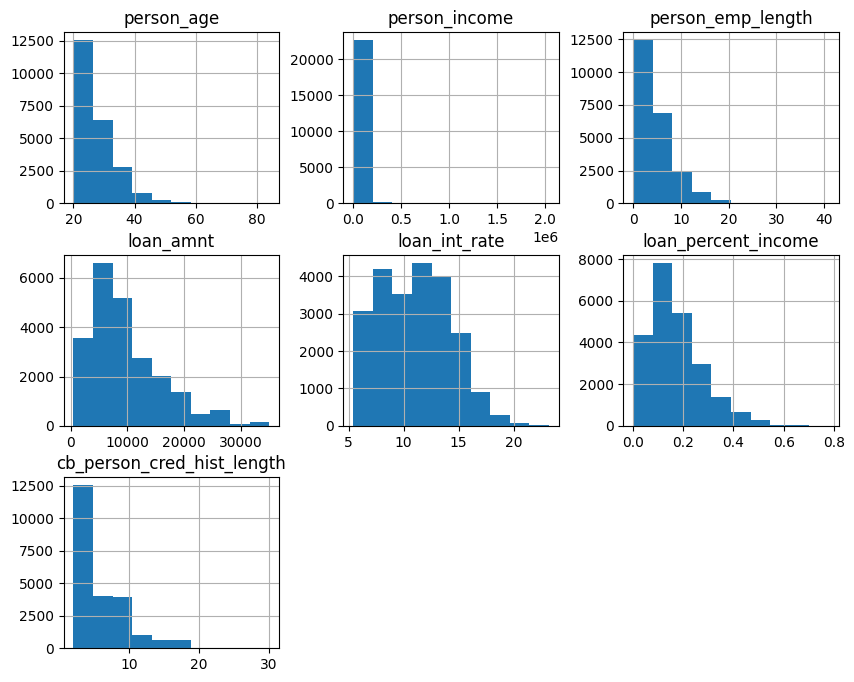

In [19]:
train_set[features_num].hist(figsize = (10,8))

In [20]:
corre = train_set.corr(numeric_only=True)
corr_abs = np.abs(corre[target].sort_values(ascending = True))
corr_abs

person_income                 0.165855
person_emp_length             0.089650
person_age                    0.022640
cb_person_cred_hist_length    0.015197
loan_amnt                     0.111100
loan_int_rate                 0.344054
loan_percent_income           0.374209
loan_status                   1.000000
Name: loan_status, dtype: float64

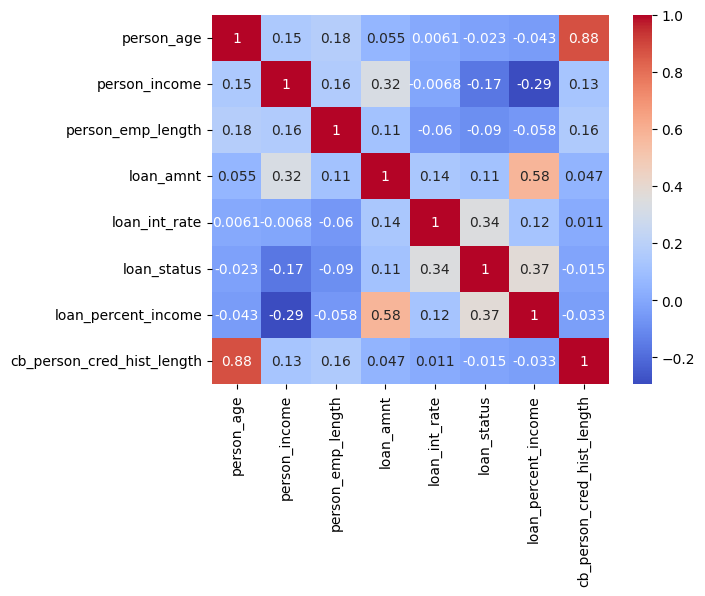

In [21]:
sns.heatmap(corre, annot= True, cmap= "coolwarm");

In [22]:
# Criterio de selección > 0.1

criterio = 0.1

features_num = corr_abs[corr_abs > criterio].index.to_list()
features_num.remove(target)

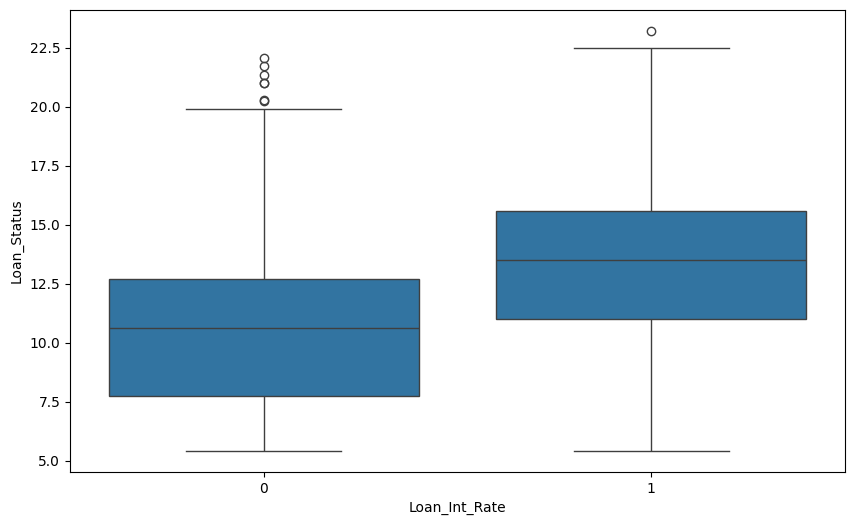

In [23]:
plt.figure(figsize= (10,6))
sns.boxplot(train_set, x= "loan_status", y= "loan_int_rate")
plt.xlabel("Loan_Int_Rate")
plt.ylabel("Loan_Status")
plt.show();

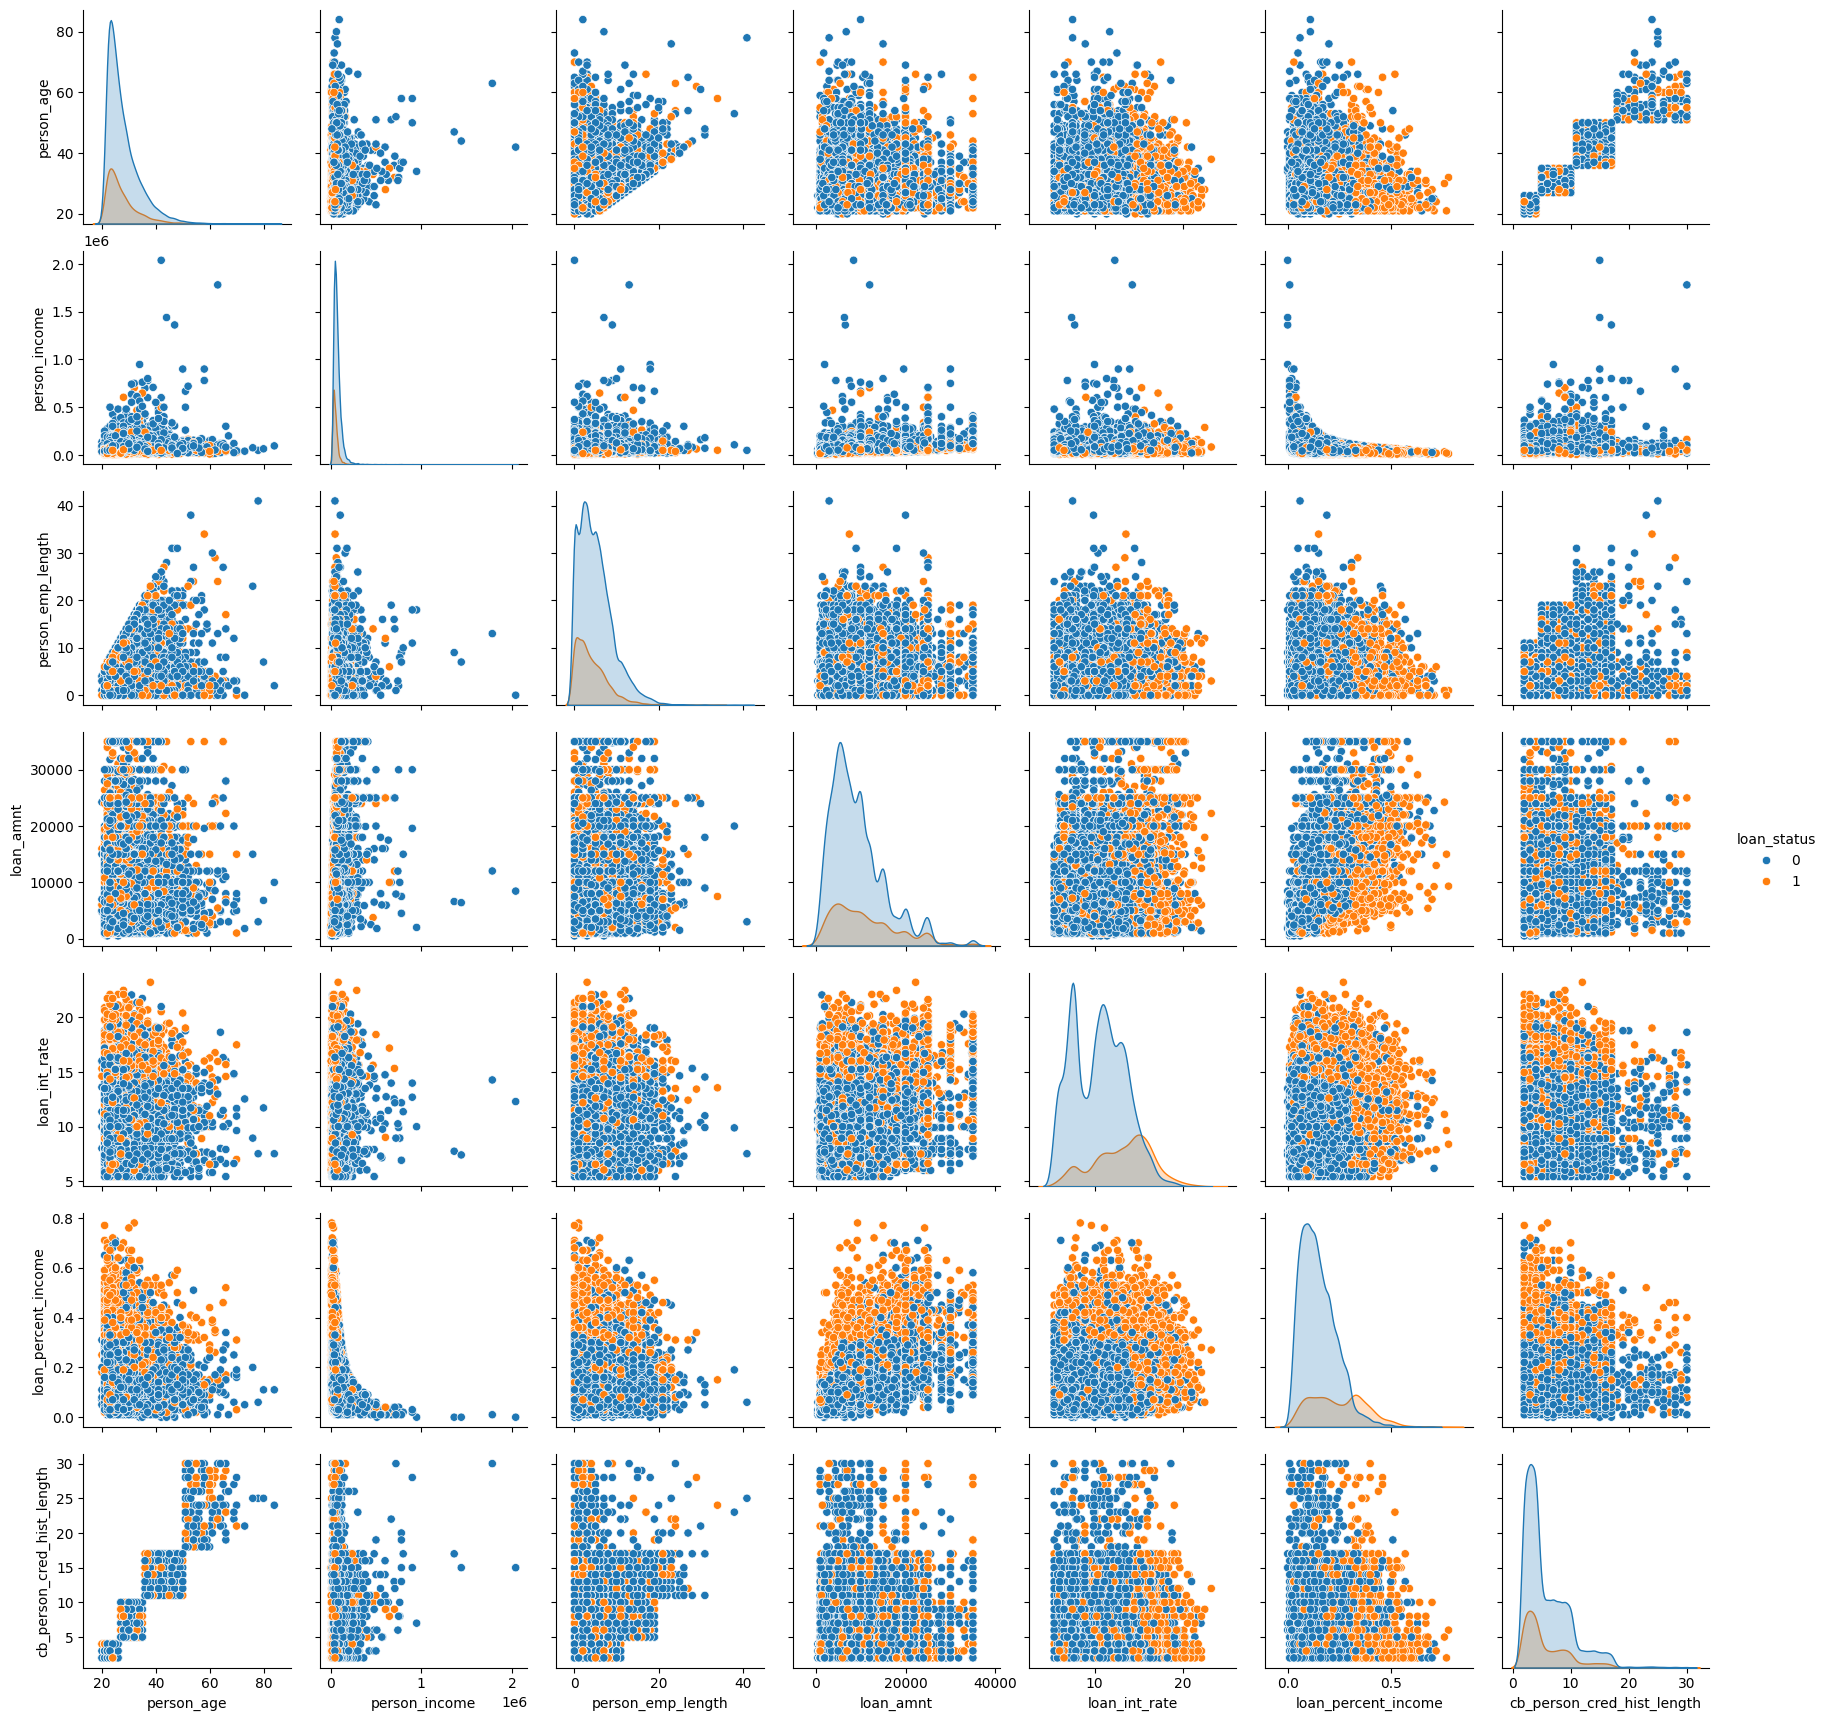

In [24]:
sns.pairplot(train_set, hue= target)
plt.show();

### 6.2 Categoricas

In [25]:
features_cat

['person_home_ownership',
 'loan_intent',
 'cb_person_default_on_file',
 'age_group']

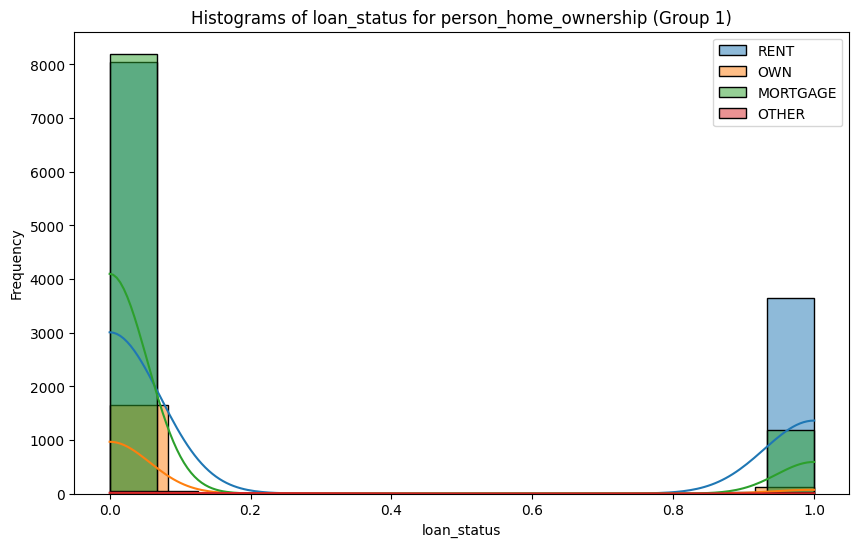

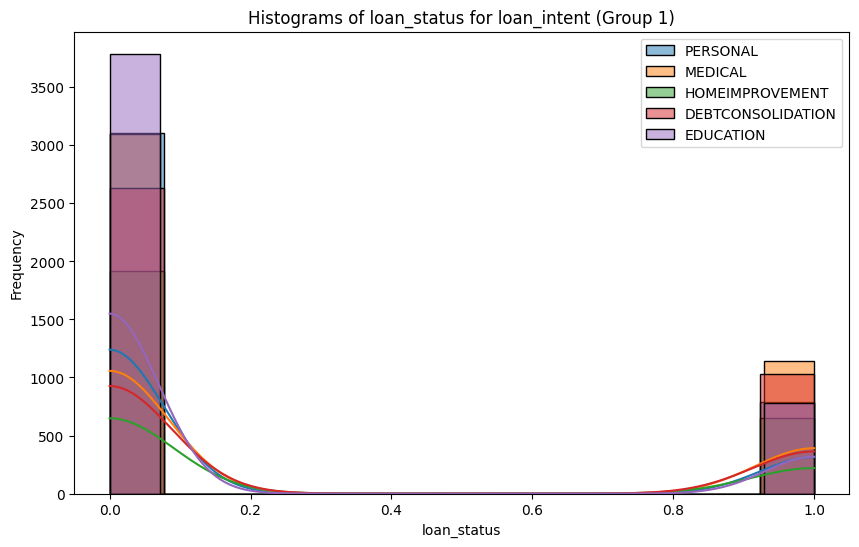

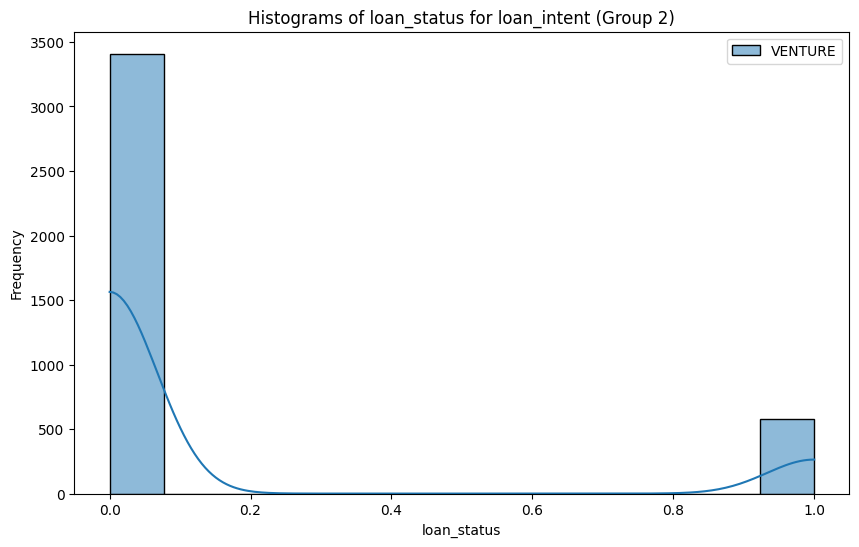

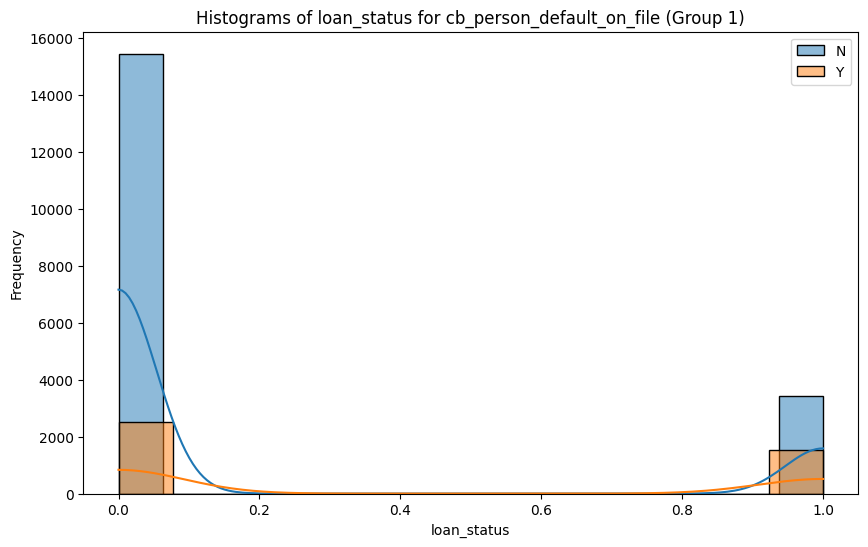

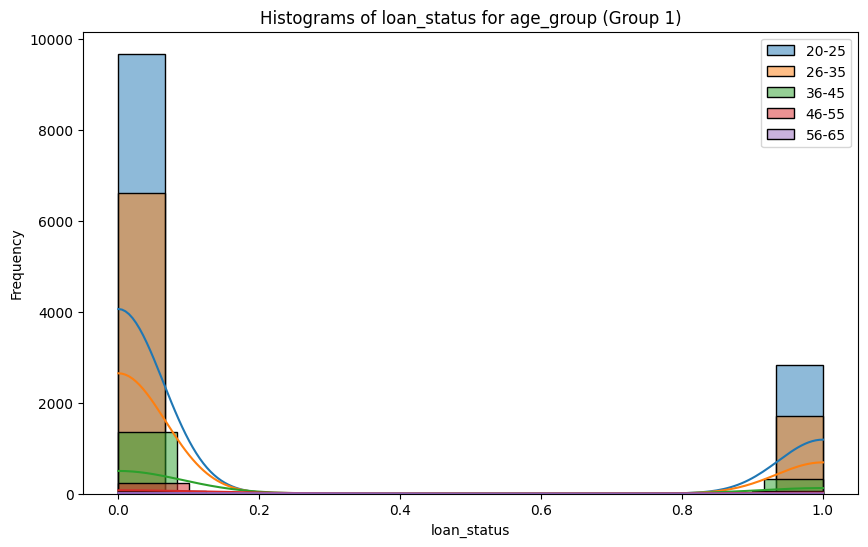

e:\Bootcamp\Repositorios\Machine_Learning_Project_Victor_Manuel_De_Sousa_Sanchez\clasificador_binario\bootcampviztools.py:223: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


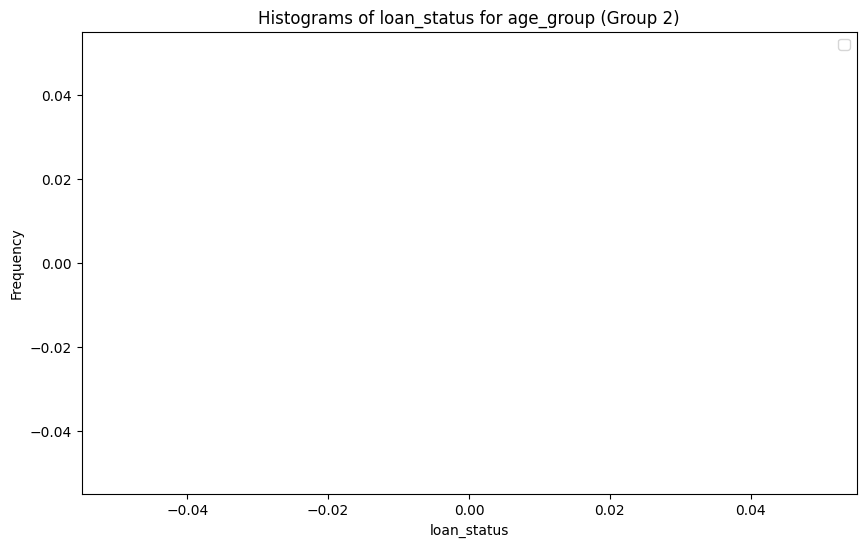

In [26]:
for i in features_cat:
    bt.plot_grouped_histograms(train_set, cat_col= i, num_col= target, group_size= 5)

C:\Users\shark\AppData\Local\Temp\ipykernel_9588\2825397741.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_age = train_set.groupby("age_group")[target].mean()


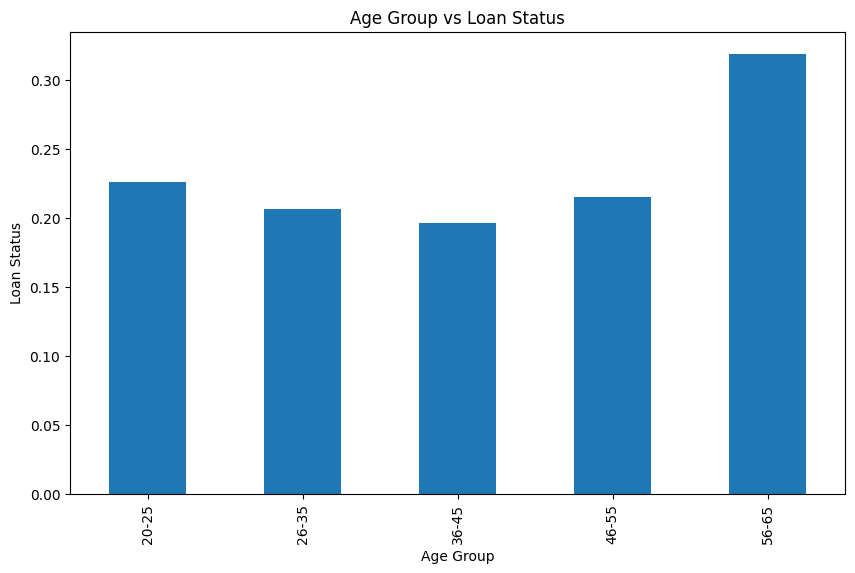

In [27]:
loan_age = train_set.groupby("age_group")[target].mean()
plt.figure(figsize=(10,6))
loan_age.plot(kind="bar")
plt.xlabel("Age Group")
plt.ylabel("Loan Status")
plt.title("Age Group vs Loan Status")
plt.show();

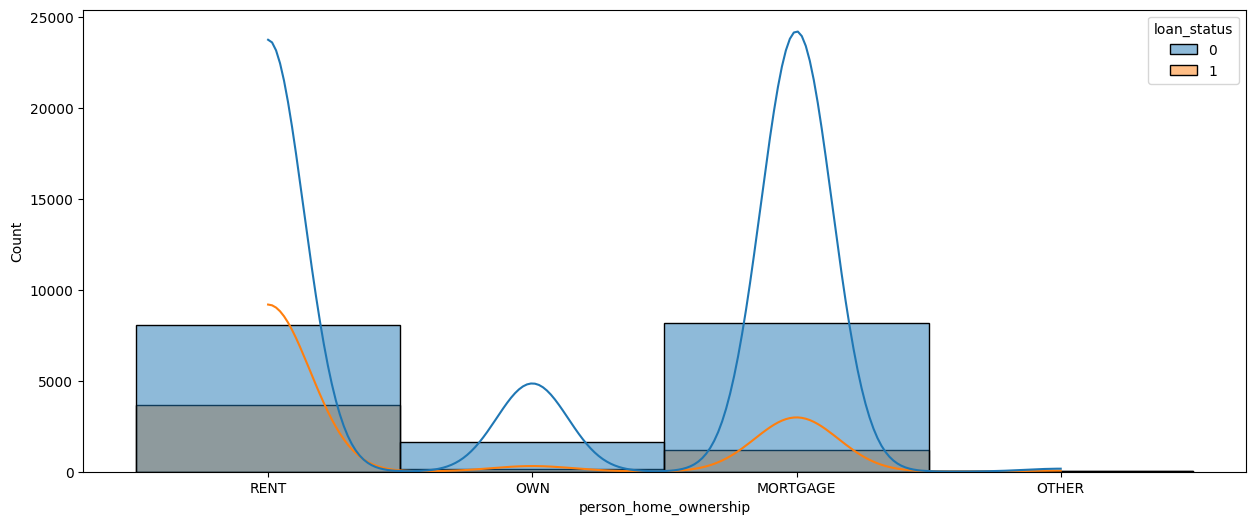

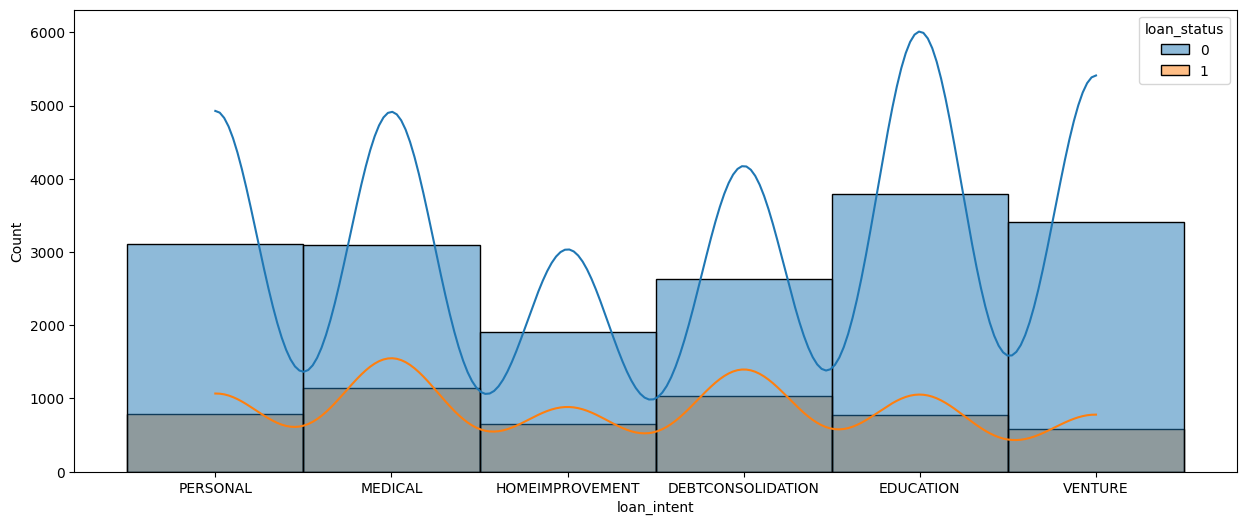

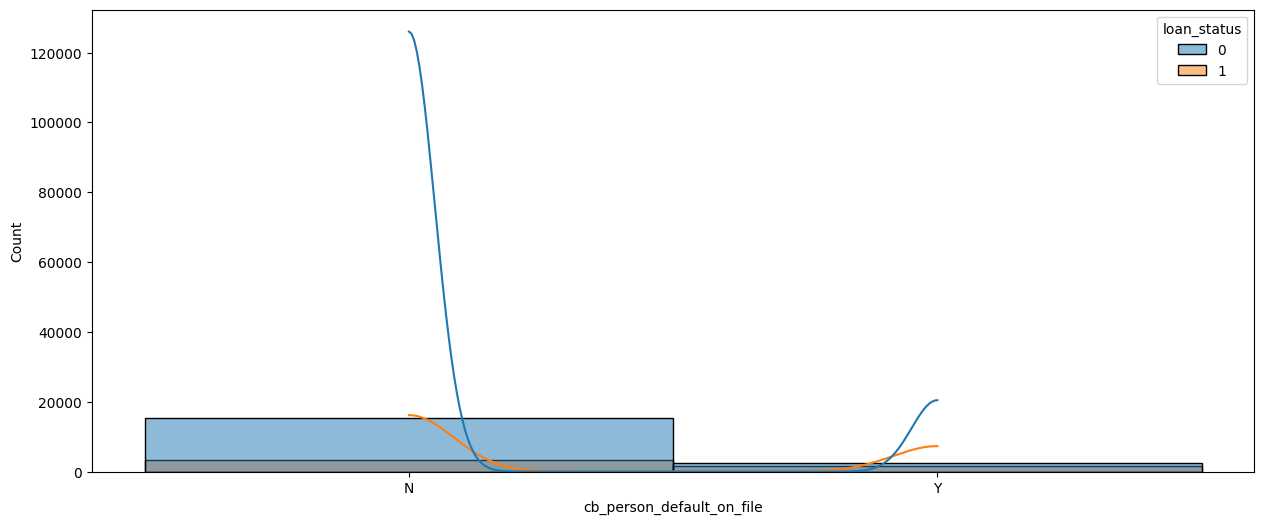

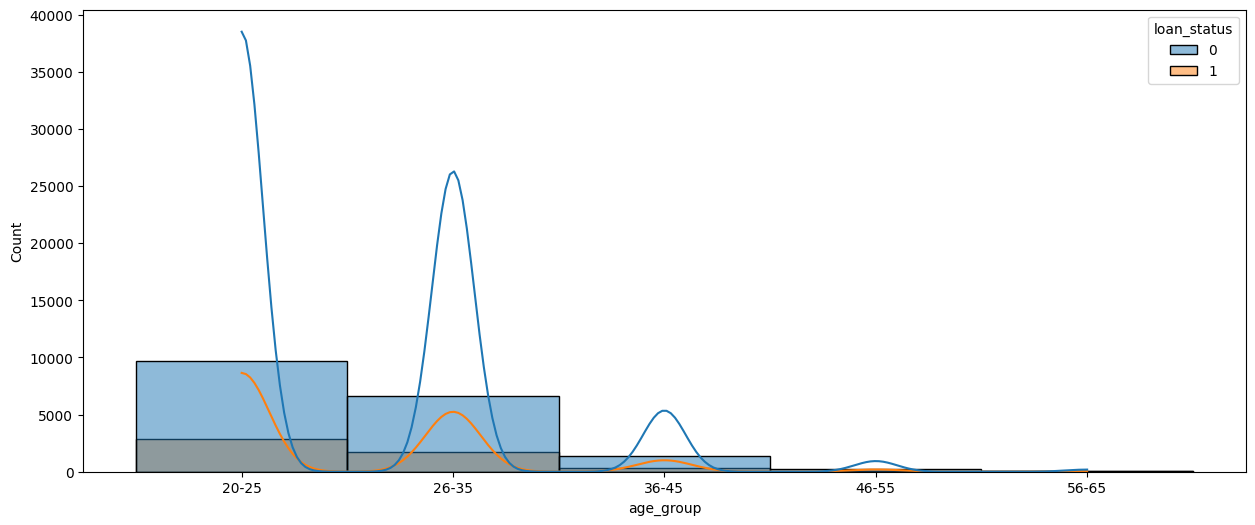

In [28]:
for i in features_cat:
    plt.figure(figsize=(15,6))
    sns.histplot(data= train_set, x= i, hue= target, kde= True)
    
    plt.show();

### 7. Selección Final de Features

In [29]:
features = features_cat + features_num
features

['person_home_ownership',
 'loan_intent',
 'cb_person_default_on_file',
 'age_group',
 'person_income',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income']

In [30]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22905 entries, 5001 to 23654
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  22905 non-null  int64   
 1   person_income               22905 non-null  int64   
 2   person_home_ownership       22905 non-null  object  
 3   person_emp_length           22905 non-null  float64 
 4   loan_intent                 22905 non-null  object  
 5   loan_grade                  22905 non-null  object  
 6   loan_amnt                   22905 non-null  int64   
 7   loan_int_rate               22905 non-null  float64 
 8   loan_status                 22905 non-null  int64   
 9   loan_percent_income         22905 non-null  float64 
 10  cb_person_default_on_file   22905 non-null  object  
 11  cb_person_cred_hist_length  22905 non-null  int64   
 12  age_group                   22882 non-null  category
dtypes: category(1), fl

In [31]:
train_set = train_set.drop(["loan_intent", "person_age","person_home_ownership","person_emp_length","cb_person_cred_hist_length"], axis= 1)
test_set = test_set.drop(["loan_intent", "person_age","person_home_ownership","person_emp_length","cb_person_cred_hist_length"], axis= 1)

In [32]:
train_set

,person_income,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,age_group
5001,35000,B,5400,10.59,0,0.15,N,20-25
17933,52000,B,4500,9.91,0,0.09,N,26-35
12799,110000,B,28000,9.91,0,0.25,N,20-25
4724,51000,B,5000,12.42,1,0.10,N,20-25
5780,50000,B,8000,10.00,0,0.16,N,20-25
...,...,...,...,...,...,...,...,...
21575,54000,D,10000,16.02,1,0.19,Y,26-35
5390,48000,E,15750,16.35,0,0.33,N,20-25
860,48000,A,18000,6.54,1,0.38,N,20-25
15795,225000,C,16800,13.92,0,0.07,Y,26-35


### 8. Tratamiento de Features

In [33]:
#Tenemos tres features que son categoricas, de modo que tendremos que hacerles un Encoder
features_cat = train_set.select_dtypes(include = ["object", "category"]).columns
train_set = pd.get_dummies(train_set, columns= features_cat)
test_set = pd.get_dummies(test_set, columns= features_cat)
train_set


,person_income,loan_amnt,loan_int_rate,loan_status,loan_percent_income,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,age_group_20-25,age_group_26-35,age_group_36-45,age_group_46-55,age_group_56-65
5001,35000,5400,10.59,0,0.15,False,True,False,False,False,False,False,True,False,True,False,False,False,False
17933,52000,4500,9.91,0,0.09,False,True,False,False,False,False,False,True,False,False,True,False,False,False
12799,110000,28000,9.91,0,0.25,False,True,False,False,False,False,False,True,False,True,False,False,False,False
4724,51000,5000,12.42,1,0.10,False,True,False,False,False,False,False,True,False,True,False,False,False,False
5780,50000,8000,10.00,0,0.16,False,True,False,False,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,54000,10000,16.02,1,0.19,False,False,False,True,False,False,False,False,True,False,True,False,False,False
5390,48000,15750,16.35,0,0.33,False,False,False,False,True,False,False,True,False,True,False,False,False,False
860,48000,18000,6.54,1,0.38,True,False,False,False,False,False,False,True,False,True,False,False,False,False
15795,225000,16800,13.92,0,0.07,False,False,True,False,False,False,False,False,True,False,True,False,False,False


array([[<Axes: title={'center': 'index'}>,
        <Axes: title={'center': 'person_income'}>],
       [<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_int_rate'}>],
       [<Axes: title={'center': 'loan_status'}>,
        <Axes: title={'center': 'loan_percent_income'}>]], dtype=object)

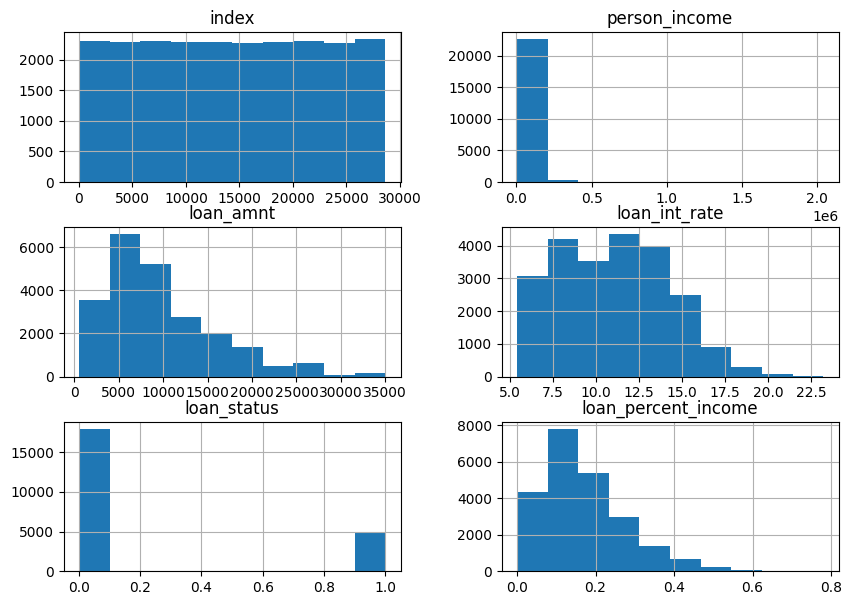

In [34]:
train_set.reset_index(inplace=True)
test_set.reset_index(inplace=True)
train_set.hist(figsize=(10,7))

### 9. Escalado 

In [35]:
#Vamos a realizar un escalado de nuestros

train_set_scaled = train_set.copy()
test_set_scaled = test_set.copy()


In [36]:
scaler = StandardScaler()

train_set_scaled[features_num] = scaler.fit_transform(train_set_scaled[features_num])
test_set_scaled[features_num] = scaler.transform(test_set_scaled[features_num])

In [37]:
train_set_scaled.set_index("index", inplace= True)
test_set_scaled.set_index("index", inplace = True)

In [38]:
train_set_scaled

,person_income,loan_amnt,loan_int_rate,loan_status,loan_percent_income,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,age_group_20-25,age_group_26-35,age_group_36-45,age_group_46-55,age_group_56-65
index,,,,,,,,,,,,,,,,,,,
5001,-0.605984,-0.669045,-0.138349,0,-0.181338,False,True,False,False,False,False,False,True,False,True,False,False,False,False
17933,-0.277558,-0.810954,-0.349422,0,-0.746599,False,True,False,False,False,False,False,True,False,False,True,False,False,False
12799,0.842952,2.894457,-0.349422,0,0.760764,False,True,False,False,False,False,False,True,False,True,False,False,False,False
4724,-0.296877,-0.732116,0.429683,1,-0.652389,False,True,False,False,False,False,False,True,False,True,False,False,False,False
5780,-0.316196,-0.259084,-0.321486,0,-0.087127,False,True,False,False,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,-0.238920,0.056270,1.547124,1,0.195503,False,False,False,True,False,False,False,False,True,False,True,False,False,False
5390,-0.354835,0.962913,1.649556,0,1.514446,False,False,False,False,True,False,False,True,False,True,False,False,False,False
860,-0.354835,1.317686,-1.395471,1,1.985497,True,False,False,False,False,False,False,True,False,True,False,False,False,False


### 10. Separación de X e Y

In [39]:
X_train = train_set_scaled.drop(target, axis= 1)
y_train = train_set_scaled[target]
X_test = test_set_scaled.drop(target, axis= 1)
y_test = test_set_scaled[target]

### 11. Modelado

In [40]:
#Vamos a comenzar el modelado. Sabemos que el target esta desbalanceado. Haremos todas pero, dado este asunto, nos centraremos en RandomForest y XGBoost.

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBooster": XGBClassifier(use_label_encoder = False, eval_metric = "logloss"),
    "CatBoostClassifier": CatBoostClassifier(silent = True)
}

In [41]:
#Bien, una vez definidos los modelos, vamos a entrenarlos. 

resultados = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    resultados[name] = accuracy
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 40)

Model: Logistic Regression
Accuracy: 0.8380
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4488
           1       0.68      0.48      0.56      1239

    accuracy                           0.84      5727
   macro avg       0.77      0.71      0.73      5727
weighted avg       0.83      0.84      0.83      5727

----------------------------------------
Model: Decision Tree
Accuracy: 0.8411
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      4488
           1       0.63      0.65      0.64      1239

    accuracy                           0.84      5727
   macro avg       0.77      0.77      0.77      5727
weighted avg       0.84      0.84      0.84      5727

----------------------------------------
Model: Random Forest
Accuracy: 0.8676
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      4488
           1       0.72      0.64  

c:\Users\shark\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:42:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBooster
Accuracy: 0.8732
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4488
           1       0.74      0.64      0.69      1239

    accuracy                           0.87      5727
   macro avg       0.82      0.79      0.80      5727
weighted avg       0.87      0.87      0.87      5727

----------------------------------------
Model: CatBoostClassifier
Accuracy: 0.8722
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4488
           1       0.74      0.64      0.68      1239

    accuracy                           0.87      5727
   macro avg       0.82      0.79      0.80      5727
weighted avg       0.87      0.87      0.87      5727

----------------------------------------


In [42]:
#Veamos un Resumen
print("Resumen de precision:")
for model, acc in resultados.items():
    print(f"{model} : {acc:.4f}")

Resumen de precision:
Logistic Regression : 0.8380
Decision Tree : 0.8411
Random Forest : 0.8676
Support Vector Machine : 0.8442
Naive Bayes : 0.8144
Gradient Boosting : 0.8668
XGBooster : 0.8732
CatBoostClassifier : 0.8722


Podemos ver que el XGBooster y el CatBoostClassifier son los modelos que más accuracy tienen con una certeza del **78.54%**

### 12. Optimización

In [45]:
#Vamos a calcular los pesos para el ajuste del XGBoost
num_pos = (y_train == 0).sum()
num_neg = (y_train == 1).sum()
scale_pos_weight = num_neg/num_pos

#Ahora el CatBoost
class_weight = [num_neg / len(y_train), num_pos / len(y_train)]

In [46]:
#Vamos a comenzar con un Grid Search y que busque mejores parametros para los modelos con mejor accuracy. 

param_grids = {
    "Random Forest": {
        "n_estimators": [50,100,200],
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 10,20],
        "min_samples_split": [2,5,10],
        "min_samples_leaf" : [1,2,4],
        "class_weight": ["balanced"]
    },
    "XGBooster" : {
        'n_estimators': [100, 200],
        'learning_rate': [0.1, 0.2],
        'max_depth': [3, 5],
        'min_child_weight': [1, 3],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'scale_pos_weight' : [scale_pos_weight],
        'gamma': [0, 0.1],
        'reg_alpha': [0, 0.1],
        'reg_lambda': [1, 1.5]
    },
    "CatBoostClassifier" :{
        "iterations": [100,200],
        "learning_rate": [0.01,0.1,0.2],
        "depth": [4,6,10],
        "l2_leaf_reg": [1,3,5],
        "border_count": [32,64],
        "bagging_temperature": [0,1,5],
        "class_weights":[class_weight]
        
    }
    
}

In [47]:
best_models = {}

for name, model in models.items():
    print(f"Optimizando: {name}")
    if name in param_grids:
        grid_search = GridSearchCV(estimator=model, param_grid= param_grids[name], 
                                    scoring= "accuracy", cv = 5, verbose = 1, n_jobs = -1)
        grid_search.fit(X_train, y_train)
        print(f"Mejores parametros para {name}: {grid_search.best_params_}")
        print(f"Mejor score para {name}: {grid_search.best_score_:.4f}")
        best_models[name] = grid_search.best_estimator_
        print("-" * 40)
    else:
        print(f"No hay parametros definidos para {name}, saltando...")
        print("-" * 40)

Optimizando: Logistic Regression
No hay parametros definidos para Logistic Regression, saltando...
----------------------------------------
Optimizando: Decision Tree
No hay parametros definidos para Decision Tree, saltando...
----------------------------------------
Optimizando: Random Forest
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Mejores parametros para Random Forest: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mejor score para Random Forest: 0.8685
----------------------------------------
Optimizando: Support Vector Machine
No hay parametros definidos para Support Vector Machine, saltando...
----------------------------------------
Optimizando: Naive Bayes
No hay parametros definidos para Naive Bayes, saltando...
----------------------------------------
Optimizando: Gradient Boosting
No hay parametros definidos para Gradient Boosting, saltando...
--------------------

c:\Users\shark\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:03:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores parametros para XGBooster: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 0.27661353249359044, 'subsample': 0.8}
Mejor score para XGBooster: 0.8552
----------------------------------------
Optimizando: CatBoostClassifier
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\shark\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores parametros para CatBoostClassifier: {'bagging_temperature': 0, 'border_count': 64, 'class_weights': [0.21667758131412354, 0.7833224186858765], 'depth': 10, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Mejor score para CatBoostClassifier: 0.8552
----------------------------------------


Aquí, una vez mejorado los modelos con el GridSearch, podemos ver que el mejor modelo de los tres sera el Random Forest con un **86.85%** de precisión. 

De modo que, dado los resultados y optimizaciones de la máquina, nos quedamos con el **Random Forest**. Su Accuracy es el más preciso con un **86.85%** y una optimizción más que adecuada. Finalmente, nos decantamos con este modelo. 

### Random Forest: 
###     * Accuracy: 86.85%